# Different types of missing data?



MCAR(Missing completely at random)

where the probability of missing data is the same for all the variables. 

In [1]:
import pandas as pd

import numpy as np


In [2]:
df=pd.read_csv('titanic_train.csv')

In [3]:
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [4]:
df.isnull().sum()

#Sum of records null in each category

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

In [5]:
#age and cabin aren't mcar because they are missing because the people have already died so there is no one to check from

In [6]:
df[df['embarked'].isnull()] #this is mcar

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
109,168,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,6,NaN,NaN,1


Missing data not at random(MNAR)//Systematic Random value

there is some relationship between the data that is missing at other values

In [7]:
##Example-- cabin and age

df['cabin_null']=np.where(df['cabin'].isnull(),1,0)

#find the percentage of NaN values

df['cabin_null'].mean()

#77% values are missing

0.7752941176470588

In [8]:
df.columns

Index(['passenger_id', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest',
       'survived', 'cabin_null'],
      dtype='object')

In [9]:
df.groupby(['survived'])['cabin_null'].mean()

survived
0    0.880819
1    0.594249
Name: cabin_null, dtype: float64

Missing at random(Some people refusing to fill ina particular data)

##Techniques

1. Mean/Median/Mode replacement
2. Random Sample Imputation
3. Capturing NaN values with a new feature
4. End of distribution Imputation
5. Arbitrary Imputauion
6. Frequent Categories Imputation

# Mean/Median/Mode Imputation
# When to apply

it has the assumption that the data is MCAR

we can solve this by replacing the NaN with the most frequently occuring values

In [10]:
df=pd.read_csv('titanic_train.csv',usecols=['age','fare','survived'])

In [11]:
df.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


In [12]:
#Percentage of NaN values

df.isnull().mean()

#Age needs to be handled first

age         0.204706
fare        0.001176
survived    0.000000
dtype: float64

In [13]:
def impute_NaN(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [14]:
median=df.age.median()
median

28.0

In [15]:
impute_NaN(df,'age',median)

df.head()

,age,fare,survived,age_median
0,NaN,7.7333,1,28.0
1,38.0,8.6625,0,38.0
2,30.0,24.1500,0,30.0
3,54.0,23.0000,1,54.0
4,40.0,13.0000,0,40.0


In [16]:
print(df['age'].std())
print(df['age_median'].std())

#The standard standard deviation isn't varying by much

14.562243434125556
12.999022882894202


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

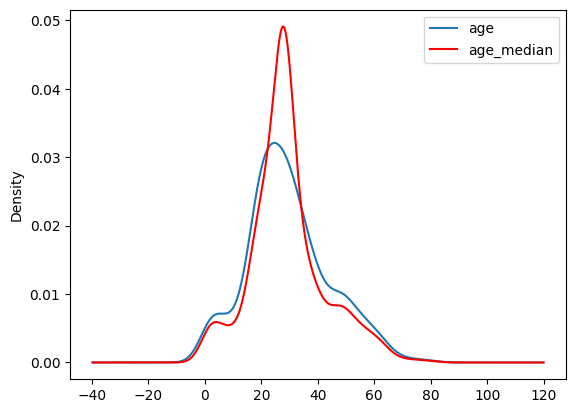

In [18]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['age'].plot(kind='kde',ax=ax)
df.age_median.plot(kind='kde', ax=ax, color='red') 
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

#Blue line is before the imputation

# Advantages and Disadvantages
### Advantages
1. Easy to implement(Robust to outliers)
2. Faster way to obtain the complete dataset

### Disadvantages
1. Change or distortion in the original variance
2. Impacts correlation

# Random Sample Imputation


consists of taking random observation from the dataset and this observation is used to replace NaN values. It assumes that the data is MCAR. 

In [19]:
df.head()

,age,fare,survived,age_median
0,NaN,7.7333,1,28.0
1,38.0,8.6625,0,38.0
2,30.0,24.1500,0,30.0
3,54.0,23.0000,1,54.0
4,40.0,13.0000,0,40.0


In [20]:
df=pd.read_csv('titanic_train.csv',usecols=['age','fare','survived'])
df.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


In [21]:
df.isnull().sum()

age         174
fare          1
survived      0
dtype: int64

In [22]:
df.isnull().mean()

#For Percentage

age         0.204706
fare        0.001176
survived    0.000000
dtype: float64

In [23]:
df['age'].dropna().sample()

#Index and the random value is returned

493    22.0
Name: age, dtype: float64

In [24]:
df['age'].dropna().sample(df['age'].isnull().sum(),random_state=0)

#The NaN values are getting replaced randomly and if the random state is kept as zero, the vaues 
#don't change everytime the code is run

716    27.0
39     29.0
446    25.0
240     8.0
508    32.0
       ... 
801    47.0
669     9.0
768    21.0
16     40.0
250    48.0
Name: age, Length: 174, dtype: float64

In [25]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    
    #The random sample to fill na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    
    #The index needs to be same to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+"_random"]=random_sample
    
    #In the last line,using loc the specified column is replaced with the matching index of random_sample if
    #the condition is met

In [26]:
impute_nan(df,"age",df['age'].median())

In [27]:
df.head()

,age,fare,survived,age_median,age_random
0,NaN,7.7333,1,28.0,27.0
1,38.0,8.6625,0,38.0,38.0
2,30.0,24.1500,0,30.0,30.0
3,54.0,23.0000,1,54.0,54.0
4,40.0,13.0000,0,40.0,40.0


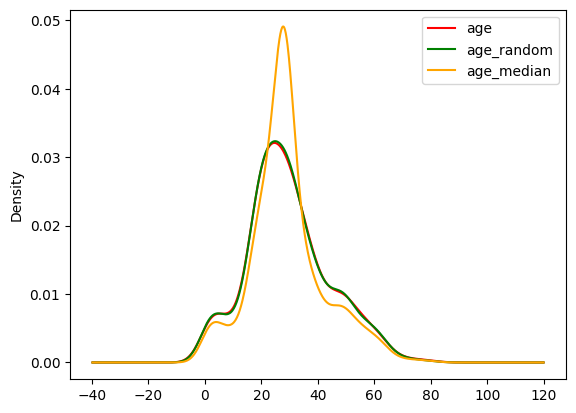

In [28]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['age'].plot(kind='kde',ax=ax,color='red')
df.age_random.plot(kind='kde', ax=ax, color='green') 
df.age_median.plot(kind='kde',ax=ax,color='orange')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

# Advnatages

1. Easy to implement
2. No distortion in variance

# Disadvantages

1. Randomness won't work in every situation


### Capturing NaN values with a new feature

It works well if the data isn't MCAR or is MAR



In [29]:
df=pd.read_csv('titanic_train.csv',usecols=['age','fare','survived'])
df.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


In [30]:
df['age']

0       NaN
1      38.0
2      30.0
3      54.0
4      40.0
       ... 
845    55.0
846    58.0
847    24.0
848     3.0
849    52.0
Name: age, Length: 850, dtype: float64

In [31]:
df['age_nan']=np.where(df['age'].isnull(),1,0)

In [32]:
df.head()

,age,fare,survived,age_nan
0,NaN,7.7333,1,1
1,38.0,8.6625,0,0
2,30.0,24.1500,0,0
3,54.0,23.0000,1,0
4,40.0,13.0000,0,0


In [33]:
df.age.median()

28.0

In [34]:
df['age'].fillna(df.age.median(),inplace=True)

In [35]:
df.head()

#Wherever there was data missing, i.e. age_nan=1, age has been replaced by the median

,age,fare,survived,age_nan
0,28.0,7.7333,1,1
1,38.0,8.6625,0,0
2,30.0,24.1500,0,0
3,54.0,23.0000,1,0
4,40.0,13.0000,0,0


# Advantages

1. Easy to implement
2. Captures the importance of missing values

# Disadvantage

1. Creating additional features(i.e. if there are many features,that many additional features will be created for   each category, known as curse of dimensionality)

### End of distribution Imputation

when missing values are MNAR

In [36]:
df=pd.read_csv('titanic_train.csv',usecols=['age','fare','survived'])
df.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


<AxesSubplot:>

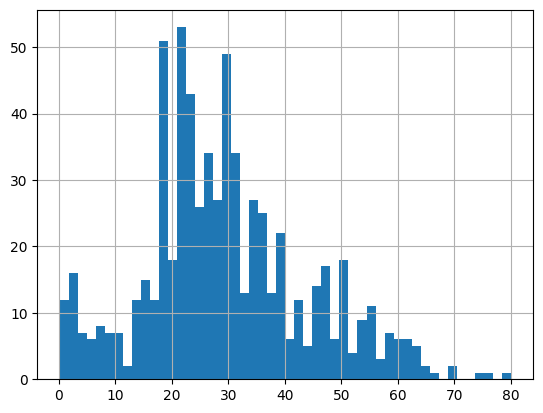

In [37]:
df.age.hist(bins=50)

In [38]:
df.age.mean()

29.519847189349115

In [39]:
extreme=df.age.mean()+3*df.age.std()
print(extreme)

#Taking the far end i.e. the value after the third normal distribution

#This will be used to replace all the nan values

73.20657749172578


<AxesSubplot:xlabel='age'>

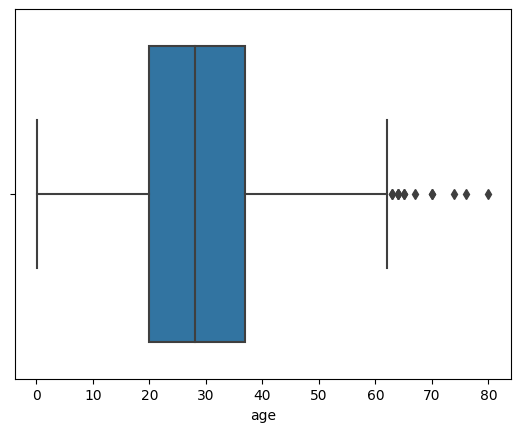

In [40]:
import seaborn as sns
sns.boxplot(x='age',data=df)

#Checking for outliers

In [41]:
def impute_nan(df,variable,median,extreme):
        df[variable+"_end_distribution"]=df[variable].fillna(extreme)
        df[variable].fillna(median,inplace=True)

In [42]:
impute_nan(df,'age',df.age.median(),extreme)

In [43]:
df.head()

,age,fare,survived,age_end_distribution
0,28.0,7.7333,1,73.206577
1,38.0,8.6625,0,38.000000
2,30.0,24.1500,0,30.000000
3,54.0,23.0000,1,54.000000
4,40.0,13.0000,0,40.000000


<AxesSubplot:>

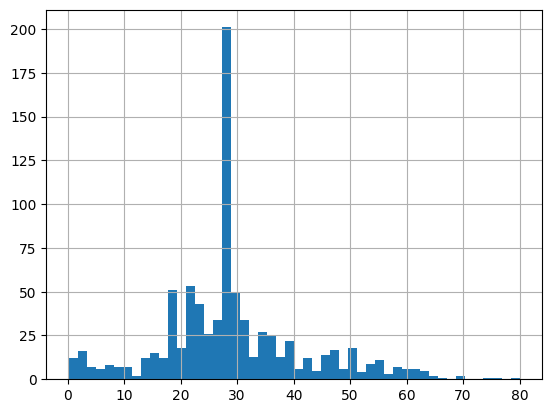

In [44]:
df['age'].hist(bins=50)

#Huge shift in variance

<AxesSubplot:>

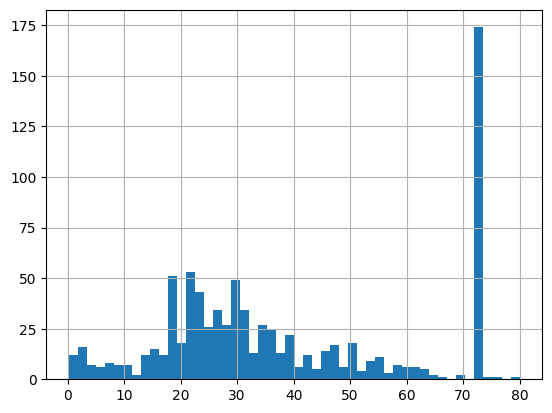

In [45]:
df['age_end_distribution'].hist(bins=50)

<AxesSubplot:xlabel='age_end_distribution'>

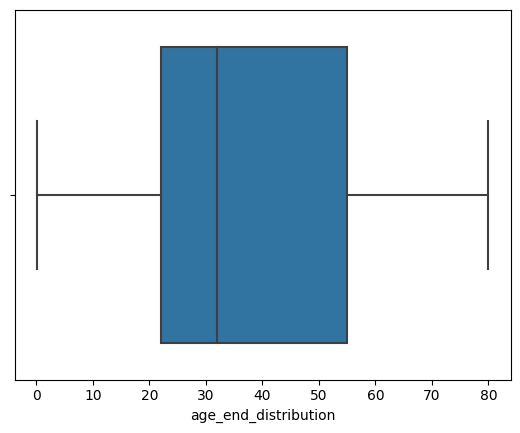

In [46]:
sns.boxplot(x='age_end_distribution',data=df)

#Outliers have been captured

# Advantages
1. easy to implement
2. captures the importance of missing values

# Disadvantages
1. Distorts the original distribution
2. If missing variables are not important, it may mask the importance of the origional variable
3. if the number of NA are large, it will mask the true outliers
4. If the number of NA is too small, the replaced NA may be considered as an outlier

#### Arbitraray Value Imputation

It consists of replacing NaN by an arbitrary value. 
this technique was derived from a kaggle competition

In [47]:
df=pd.read_csv('titanic_train.csv',usecols=['age','fare','survived'])
df.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


In [48]:
def impute_nan(df,variable):
    df[variable+"_zero"]=df[variable].fillna(0)
    df[variable+"_hundred"]=df[variable].fillna(100)

<AxesSubplot:>

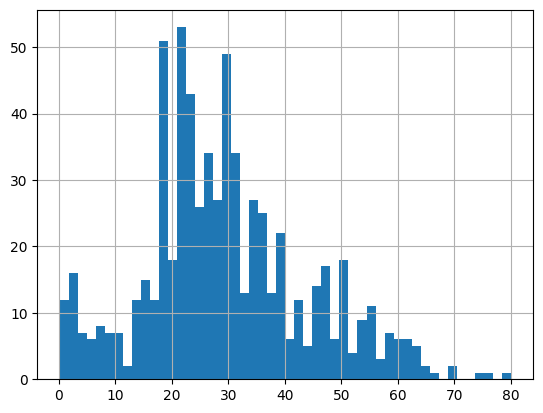

In [49]:
df['age'].hist(bins=50)

### Arbitrary value shouldn't be more frequently present

# Advantages
1. Easy to implement
2. Captures the importance of missingness if there in one

# Disadvantages

1. Distorts the original distribution
2. if missingness in not important, it may mask the predictive power of the original variable by distorting its distribution
3. Hard to decide which value to use. 

# Handling Categorical Features

## Frequent Category Imputaion

In [50]:
df=pd.read_csv('House price train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [51]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [52]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [53]:
df.shape

(1460, 4)

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64


<AxesSubplot:xlabel='BsmtQual'>

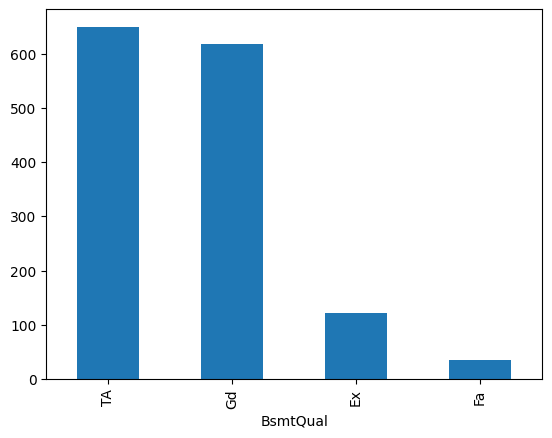

In [54]:
##BsmtQual and GarageType have less nan values compared to the number of records, it will not distort the dataset 
#to replace the nan with the most frequent occuring values

#Compute the frequency for every feature

print(df['BsmtQual'].value_counts())

df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

AxesSubplot(0.125,0.11;0.775x0.77)


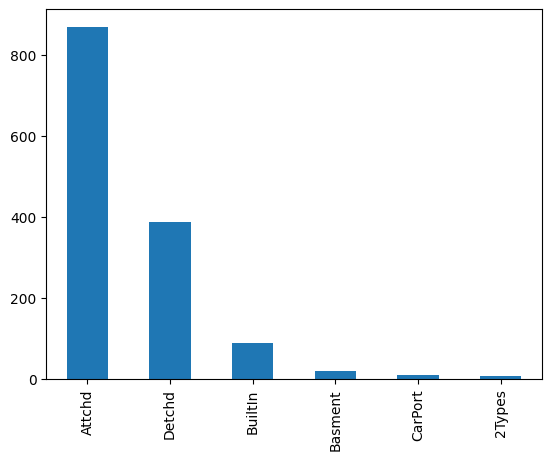

In [55]:
print(df['GarageType'].value_counts().plot.bar())

AxesSubplot(0.125,0.11;0.775x0.77)


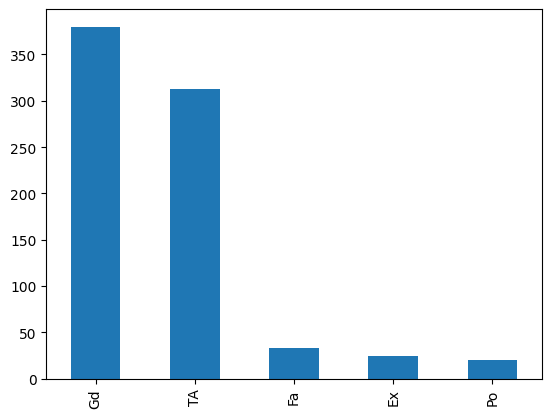

In [56]:
print(df['FireplaceQu'].value_counts().plot.bar())

In [57]:
df['GarageType'].value_counts().index[0]

#Finding the most frequent category

'Attchd'

In [58]:
#Replacing Function

def impute_variable(df,variable):
    most_frequent_category=df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [59]:
for feature in df.columns:
    impute_variable(df,feature)

In [60]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [61]:
df.isnull().mean()

#Null values removed

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

## Advantages

1. Easy to implement
2. Faster way to implement


# Disadvantages

1. For categories with large amount of nan values, the dataset will get distorted. 
2. The most frequent label may be over-represented




# Adding a Variable to Capture NaN

In [62]:
df=pd.read_csv('House price train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [63]:
df['BsmtQual_Var']=np.where(df['BsmtQual'].isnull(),1,0)

In [64]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [68]:
frequent=df['BsmtQual'].mode()[0]

print(frequent)

TA


In [70]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [71]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [72]:
df['FireplaceQu_Var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

In [73]:
df.head()

#This is conducive for imputing values in features with many null values because we are also capturing the
#importance of missing features and not directly imputing which may lead to overrepresenting

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


In [74]:
df.isnull().mean()

BsmtQual           0.000000
FireplaceQu        0.000000
GarageType         0.055479
SalePrice          0.000000
BsmtQual_Var       0.000000
FireplaceQu_Var    0.000000
dtype: float64

# Suppose if there are more frequent categories, we just replace NaN with a new category

this is one of the most commonly used strategy 

In [89]:
df=pd.read_csv('House price train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [94]:
def impute_nan(df,variable):
    df[variable+"_newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [95]:
for feature in ['BsmtQual','FireplaceQu','GarageType','SalePrice']:
    impute_nan(df,feature)

In [96]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar,SalePrice_newvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd,208500
1,Gd,TA,Attchd,181500,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000,Gd,TA,Attchd,250000


In [97]:
df.drop(['BsmtQual','FireplaceQu','GarageType','SalePrice'],axis=1)

,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar,SalePrice_newvar
0,Gd,Missing,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,Missing,Attchd,142125
